<a href="https://colab.research.google.com/github/Anushriya3007/ML-Lab/blob/main/ml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load data as before
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
    'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
    'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
    'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
    'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
    'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
    'spam'  # target label
]

df = pd.read_csv(url, header=None, names=column_names)

# Prepare features and target
X = df.drop('spam', axis=1)
y = df['spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes (Bayesian Decision Theory)
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities (posterior probabilities P(C|x))
posteriors = model.predict_proba(X_test)

# The classes (0=not spam, 1=spam)
classes = model.classes_

# Make Bayesian decisions: choose class with max posterior
y_pred = np.argmax(posteriors, axis=1)

# But np.argmax returns index, we map back to class labels:
y_pred_labels = classes[y_pred]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

# Show posterior for a few samples along with prediction
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"Posterior Not Spam (0): {posteriors[i][0]:.4f}")
    print(f"Posterior Spam (1): {posteriors[i][1]:.4f}")
    print(f"Predicted Class: {'Spam' if y_pred_labels[i] == 1 else 'Not Spam'}")
    print(f"True Class: {'Spam' if y_test.iloc[i] == 1 else 'Not Spam'}\n")


Accuracy: 0.8208469055374593

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

Sample 1:
Posterior Not Spam (0): 0.0000
Posterior Spam (1): 1.0000
Predicted Class: Spam
True Class: Not Spam

Sample 2:
Posterior Not Spam (0): 1.0000
Posterior Spam (1): 0.0000
Predicted Class: Not Spam
True Class: Not Spam

Sample 3:
Posterior Not Spam (0): 1.0000
Posterior Spam (1): 0.0000
Predicted Class: Not Spam
True Class: Not Spam

Sample 4:
Posterior Not Spam (0): 0.0000
Posterior Spam (1): 1.0000
Predicted Class: Spam
True Class: Spam

Sample 5:
Posterior Not Spam (0): 1.0000
Posterior Spam (1): 0.0000
Predicted Class: Not Spam
True Class: Not Spam



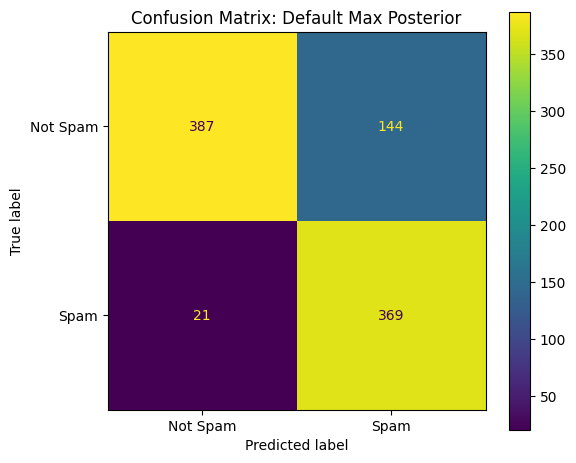

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have these predictions and true labels from previous steps:
# y_test, y_pred_default (max posterior), y_pred_cost_sensitive (cost-based decision)

# Confusion matrix for default max posterior decision
cm_default = confusion_matrix(y_test, y_pred_labels)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Not Spam', 'Spam'])

# Confusion matrix for cost-sensitive decision
# cm_cost = confusion_matrix(y_test, y_pred_cost_sensitive)
# disp_cost = ConfusionMatrixDisplay(confusion_matrix=cm_cost, display_labels=['Not Spam', 'Spam'])

# Plot side by side
fig, axes = plt.subplots(1, 1, figsize=(6,5)) # Changed to 1, 1 subplot

disp_default.plot(ax=axes) # Changed to use the single subplot
axes.set_title('Confusion Matrix: Default Max Posterior') # Changed to set title on the single subplot

# commented out cost-sensitive plot since y_pred_cost_sensitive is not defined
# disp_cost.plot(ax=axes[1])
# axes[1].set_title('Confusion Matrix: Cost-Sensitive Decision')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

# For default max posterior prediction
print("Metrics for Default Max Posterior Decision:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_labels):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_labels):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_labels):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_labels):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# For cost-sensitive decision prediction
# print("\nMetrics for Cost-Sensitive Decision:")
# print(f"Accuracy:  {accuracy_score(y_test, y_pred_cost_sensitive):.4f}")
# print(f"Precision: {precision_score(y_test, y_pred_cost_sensitive):.4f}")
# print(f"Recall:    {recall_score(y_test, y_pred_cost_sensitive):.4f}")
# print(f"F1 Score:  {f1_score(y_test, y_pred_cost_sensitive):.4f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_cost_sensitive))

Metrics for Default Max Posterior Decision:
Accuracy:  0.8208
Precision: 0.7193
Recall:    0.9462
F1 Score:  0.8173

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



Accuracy (default max posterior): 0.8208469055374593
Accuracy (cost-sensitive): 0.8208469055374593

Classification Report (cost-sensitive):
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



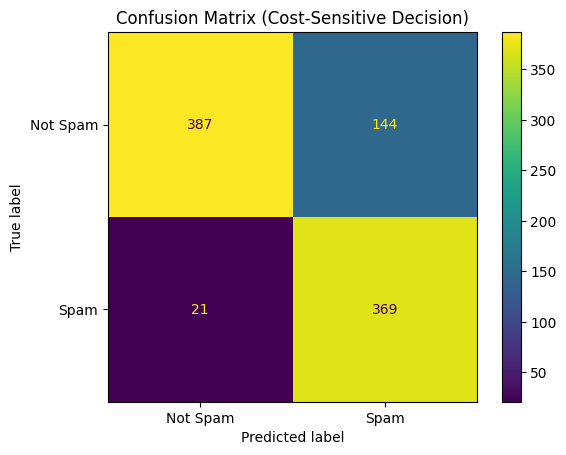

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
    'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
    'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
    'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
    'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
    'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
    'spam'  # target label
]


df = pd.read_csv(url, header=None, names=column_names)

# Features and target
X = df.drop('spam', axis=1)
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Get posterior probabilities on test data
posteriors = model.predict_proba(X_test)  # shape (n_samples, 2)

# Default decision: predict class with max posterior
y_pred_default = model.predict(X_test)

# Custom cost matrix (example):
# cost_matrix[c_true][c_pred] = cost of deciding c_pred when true class is c_true
cost_matrix = np.array([[0, 1],   # true=NotSpam, predicted=Spam cost=1 (false positive)
                        [5, 0]])  # true=Spam, predicted=NotSpam cost=5 (false negative)

# For each sample, compute expected risk of deciding class 0 or 1:
# risk(decision=c) = sum over true class t of cost(t, c) * P(t|x)
risks = np.zeros_like(posteriors)

for c in [0,1]:
    # risk of deciding class c = cost(true=0,dec=c)*P(true=0|x) + cost(true=1,dec=c)*P(true=1|x)
    risks[:, c] = cost_matrix[0, c] * posteriors[:, 0] + cost_matrix[1, c] * posteriors[:, 1]

# Choose decision with minimum risk
y_pred_cost_sensitive = np.argmin(risks, axis=1)

# Evaluate and compare
print("Accuracy (default max posterior):", accuracy_score(y_test, y_pred_default))
print("Accuracy (cost-sensitive):", accuracy_score(y_test, y_pred_cost_sensitive))

print("\nClassification Report (cost-sensitive):")
print(classification_report(y_test, y_pred_cost_sensitive))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cost_sensitive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot()
plt.title("Confusion Matrix (Cost-Sensitive Decision)")
plt.show()

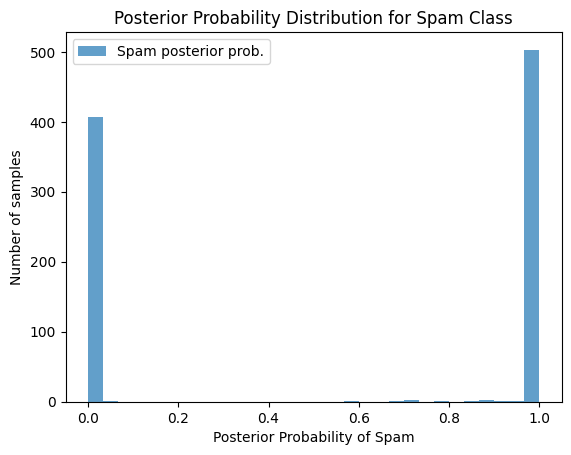

In [10]:
# Plot histogram of posterior probabilities for spam class
plt.hist(posteriors[:,1], bins=30, alpha=0.7, label='Spam posterior prob.')
plt.xlabel('Posterior Probability of Spam')
plt.ylabel('Number of samples')
plt.title('Posterior Probability Distribution for Spam Class')
plt.legend()
plt.show()


In [11]:
threshold = 0.4  # example threshold lower than 0.5 to catch more spam

y_pred_threshold = (posteriors[:,1] > threshold).astype(int)

print("Accuracy with custom threshold:", accuracy_score(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))


Accuracy with custom threshold: 0.8208469055374593
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



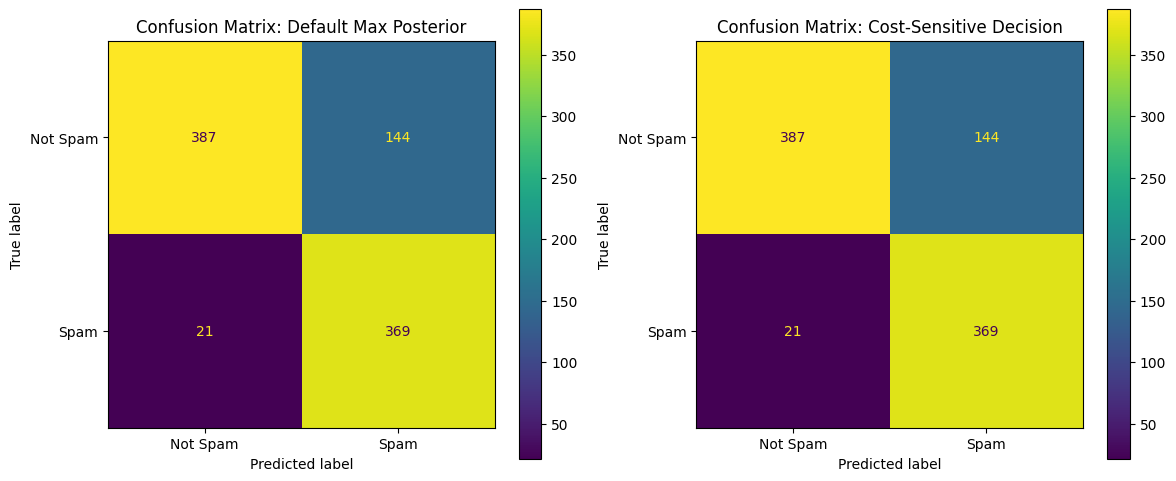

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have these predictions and true labels from previous steps:
# y_test, y_pred_default (max posterior), y_pred_cost_sensitive (cost-based decision)

# Confusion matrix for default max posterior decision
cm_default = confusion_matrix(y_test, y_pred_default)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Not Spam', 'Spam'])

# Confusion matrix for cost-sensitive decision
cm_cost = confusion_matrix(y_test, y_pred_cost_sensitive)
disp_cost = ConfusionMatrixDisplay(confusion_matrix=cm_cost, display_labels=['Not Spam', 'Spam'])

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))

disp_default.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix: Default Max Posterior')

disp_cost.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix: Cost-Sensitive Decision')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

# For default max posterior prediction
print("Metrics for Default Max Posterior Decision:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_default):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_default):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_default):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_default):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default))

# For cost-sensitive decision prediction
print("\nMetrics for Cost-Sensitive Decision:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_cost_sensitive):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cost_sensitive):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_cost_sensitive):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_cost_sensitive):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cost_sensitive))


Metrics for Default Max Posterior Decision:
Accuracy:  0.8208
Precision: 0.7193
Recall:    0.9462
F1 Score:  0.8173

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921


Metrics for Cost-Sensitive Decision:
Accuracy:  0.8208
Precision: 0.7193
Recall:    0.9462
F1 Score:  0.8173

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



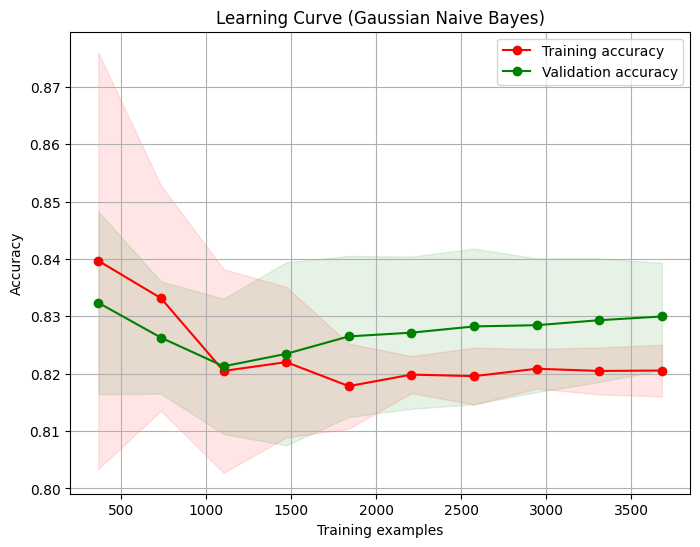

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.datasets import load_svmlight_file

# We already have X, y loaded from previous steps.

# Define a function to plot learning curve
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.title('Learning Curve (Gaussian Naive Bayes)')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training accuracy')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation accuracy')

    plt.legend(loc='best')
    plt.show()

from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 10)

model = GaussianNB()
plot_learning_curve(model, X, y, cv, train_sizes)
